<a href="https://colab.research.google.com/github/rrmurr/GitHubTest/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Load the Heart Disease dataset from UCI Repository
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header=None)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = column_names
for column in df.columns:
    unique_values = df[column].head().unique()
    print(f"Column '{column}': {unique_values}")
# Explore the first few rows of the dataset
df.head()

Column 'age': [63. 67. 37. 41.]
Column 'sex': [1. 0.]
Column 'cp': [1. 4. 3. 2.]
Column 'trestbps': [145. 160. 120. 130.]
Column 'chol': [233. 286. 229. 250. 204.]
Column 'fbs': [1. 0.]
Column 'restecg': [2. 0.]
Column 'thalach': [150. 108. 129. 187. 172.]
Column 'exang': [0. 1.]
Column 'oldpeak': [2.3 1.5 2.6 3.5 1.4]
Column 'slope': [3. 2. 1.]
Column 'ca': ['0.0' '3.0' '2.0']
Column 'thal': ['6.0' '3.0' '7.0']
Column 'target': [0 2 1]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# prompt: Begin by offering a brief overview of the dataset, including its origin, purpose, and size (number of observations and variables).

# Display dataset information
print("Dataset Overview:")
print(f"  Origin: UCI Machine Learning Repository")
print(f"  Purpose: Predict the presence of heart disease")
print(f"  Number of observations: {df.shape[0]}")
print(f"  Number of variables: {df.shape[1]}")


Dataset Overview:
  Origin: UCI Machine Learning Repository
  Purpose: Predict the presence of heart disease
  Number of observations: 303
  Number of variables: 14


In [ ]:
# prompt: Variable Summary: Provide a summary of each variable, which may include its type (e.g., categorical, numerical), range or unique values, and a brief description of what it represents.

# Variable Summary:

# age: Numerical (integer). Represents the age of the patient in years.  Range appears to be from 63 down to 29 (based on head).
# sex: Categorical (binary). Represents the sex of the patient (likely 0 for female, 1 for male, needs further investigation to confirm).
# cp: Categorical (integer). Represents the chest pain type. Needs mapping to understand the specific types.
# trestbps: Numerical (integer). Represents the resting blood pressure (in mm Hg).
# chol: Numerical (integer). Represents the serum cholesterol level (in mg/dl).
# fbs: Categorical (binary). Represents fasting blood sugar (likely 0 for <= 120 mg/dl, 1 for > 120 mg/dl, needs confirmation).
# restecg: Categorical (integer). Represents the resting electrocardiographic results. Needs mapping to understand the different results.
# thalach: Numerical (integer). Represents the maximum heart rate achieved.
# exang: Categorical (binary). Represents exercise-induced angina (likely 0 for no, 1 for yes).
# oldpeak: Numerical (float). Represents the ST depression induced by exercise relative to rest.
# slope: Categorical (integer). Represents the slope of the peak exercise ST segment. Needs mapping to interpret.
# ca: Numerical (integer). Represents the number of major vessels colored by fluoroscopy.
# thal: Categorical (integer). Represents thalassemia. Needs mapping to understand its different values.
# target: Categorical (integer). Represents the presence of heart disease (likely 0 for no disease, 1 for disease,  needs confirmation via value counts or description).


# Further investigation is needed to determine the exact meaning and ranges for some variables, especially 'cp', 'restecg', 'slope', 'ca', and 'thal', and confirming ranges and mappings for binary variables.  Descriptive statistics and value counts would be helpful for a more complete summary.


In [7]:
# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# Display value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    print(f"\nColumn '{col}':")
    print(df[col].value_counts())


Descriptive Statistics for Numerical Columns:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.6006

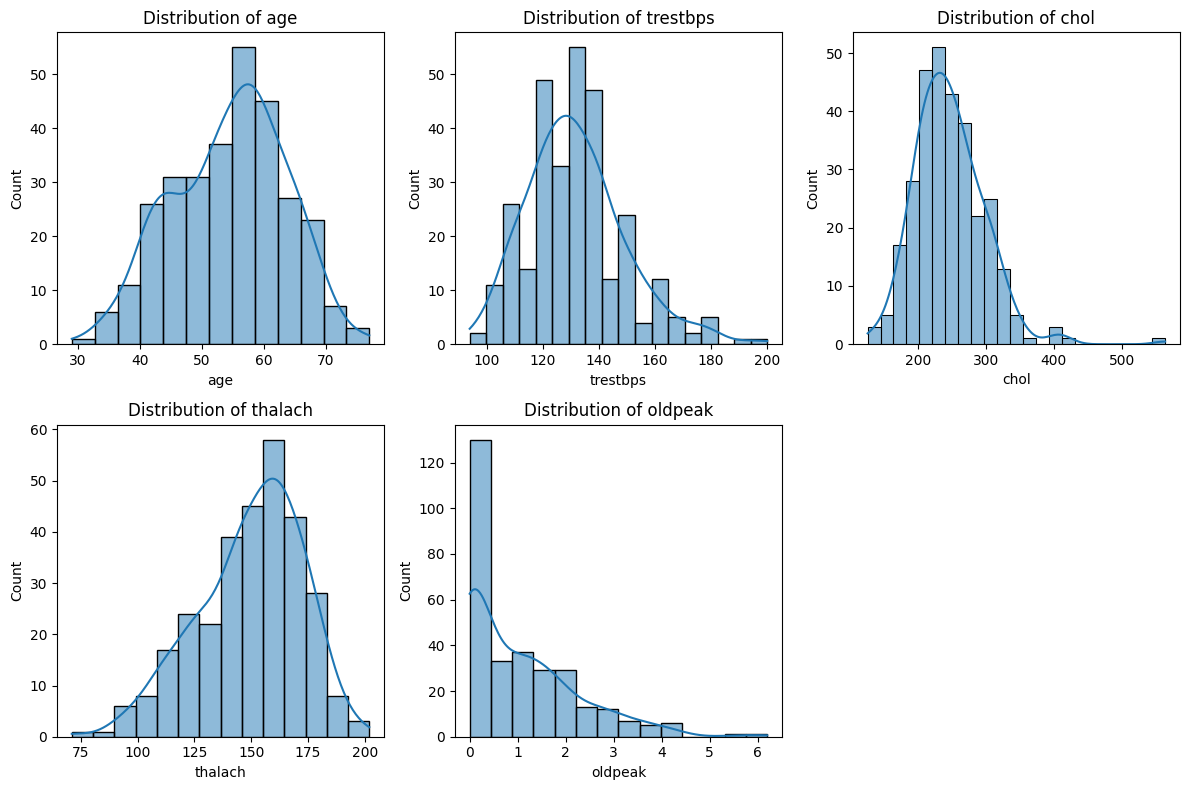

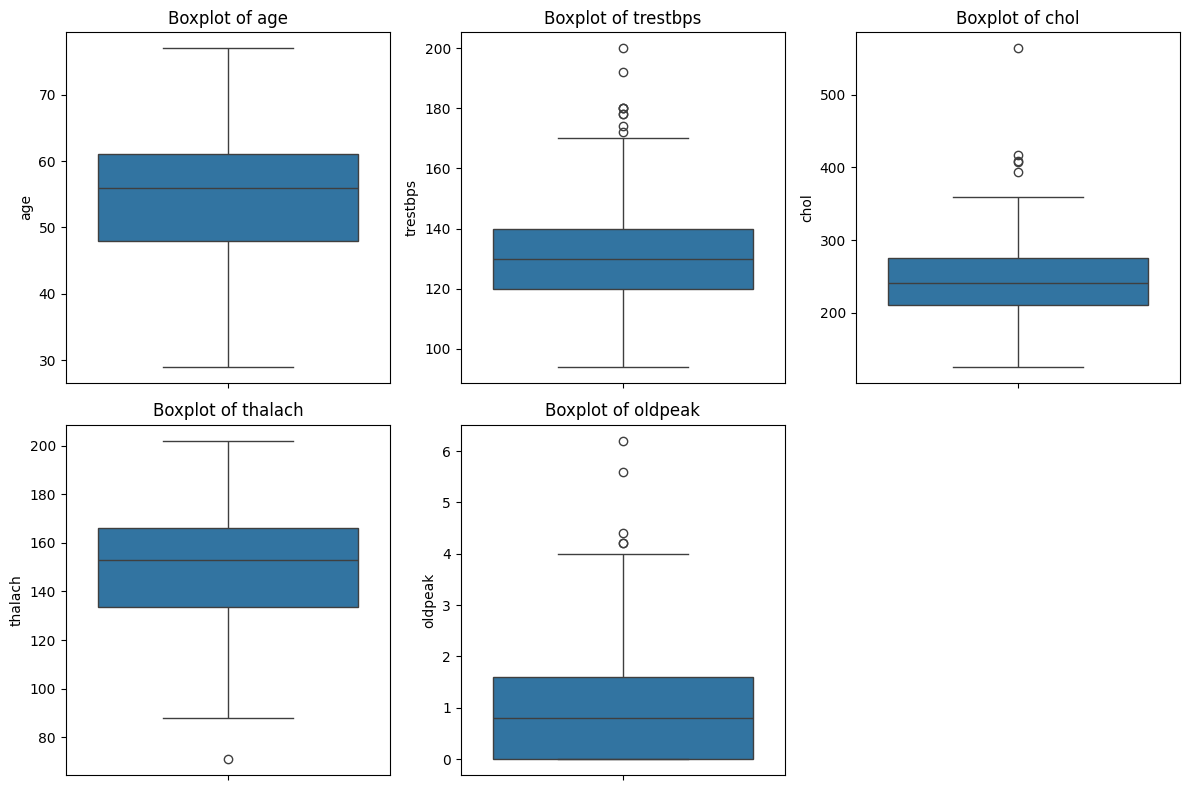

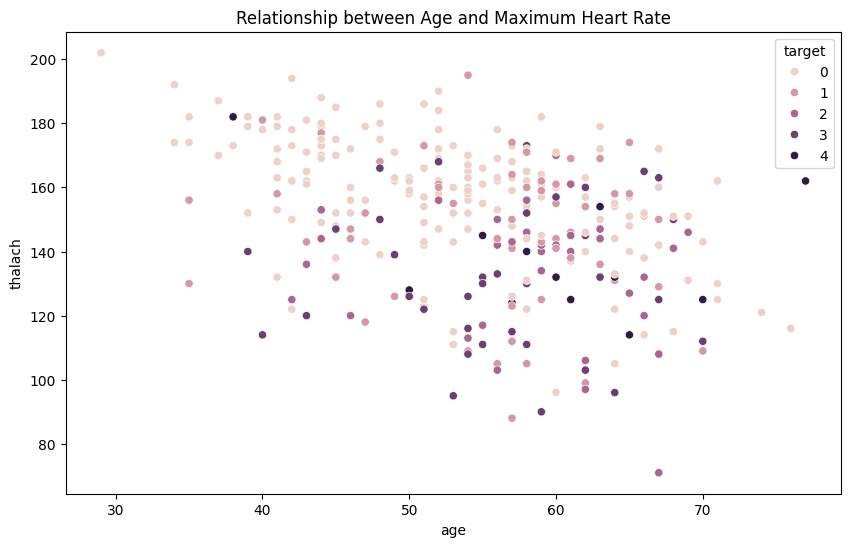

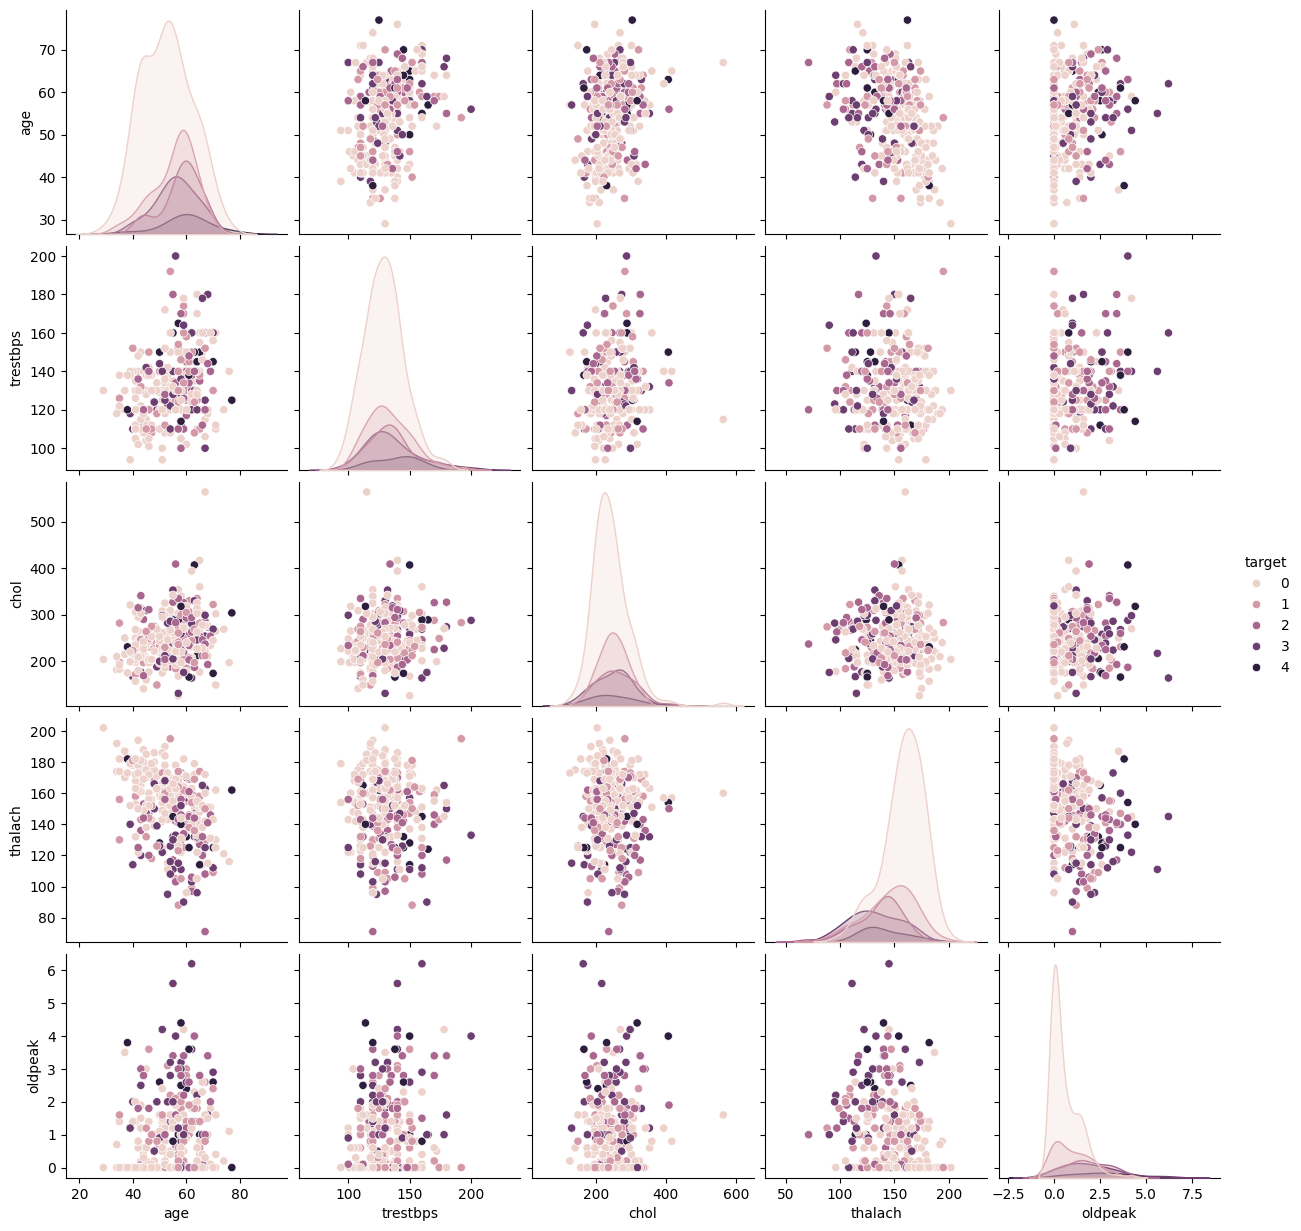

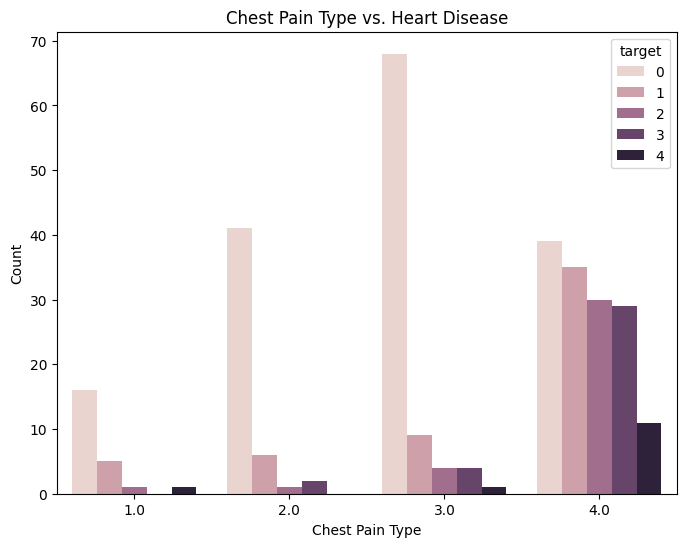

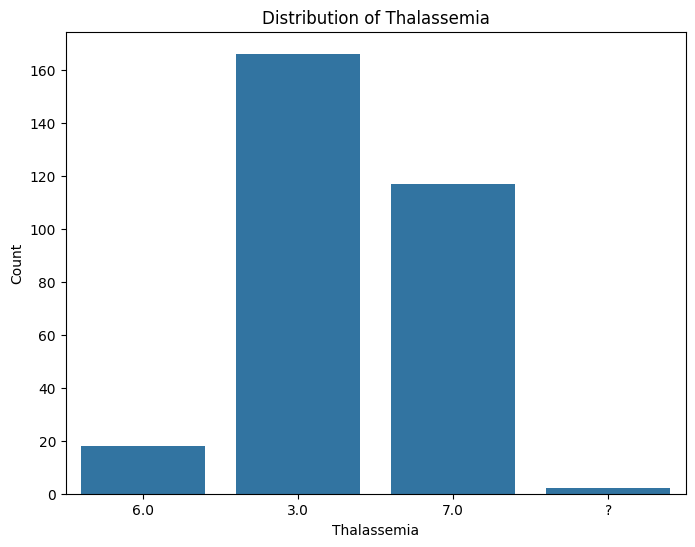

In [8]:
# prompt: Visual Exploration: Use appropriate visualizations such as histograms, box plots, and scatter plots to observe distributions, relationships, and potential anomalies in the data.

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Scatter plots for relationships between numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Relationship between Age and Maximum Heart Rate')
plt.show()

sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()


# Visualize the relationship between 'cp' (chest pain type) and 'target'
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'thal' (thalassemia)
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', data=df)
plt.title('Distribution of Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.show()



In [9]:
# prompt: Data Cleaning
# Describe how you addressed missing values, outliers, and redundant variables.

import pandas as pd
import numpy as np

# ... (Your existing code for loading and exploring the data) ...

# Handling Missing Values
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Check for missing values in each column
print(df.isnull().sum())

# Impute missing values (example using mean for numerical and mode for categorical)
for col in ['ca', 'thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric first
    df[col].fillna(df[col].mean(), inplace=True)
    # Alternatively, use the mode:
    # df[col].fillna(df[col].mode()[0], inplace=True)

# Outlier Handling
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))


# Identify outliers in relevant columns (example using 'trestbps', 'chol', 'thalach', 'oldpeak')
for col in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    outlier_indices = detect_outliers_iqr(df[col])
    print(f"Outliers in {col}: {df.iloc[outlier_indices[0]][col]}")
    # Choose a method to handle outliers:
    # 1. Removal: df.drop(df.index[outlier_indices[0]], inplace=True)
    # 2. Capping: df[col] = np.clip(df[col], lower_bound, upper_bound)
    # 3. Transformation: Use log transformation or other methods if appropriate

# Redundant Variable Handling (If Applicable)

# Example: If 'ca' and 'thal' are found to be highly correlated and provide similar information, you might consider removing one.

# ... (Your existing code for visualization) ...


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Outliers in trestbps: 14     172.0
83     180.0
126    200.0
172    174.0
183    178.0
188    192.0
201    180.0
213    178.0
231    180.0
Name: trestbps, dtype: float64
Outliers in chol: 48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
Name: chol, dtype: float64
Outliers in thalach: 245    71.0
Name: thalach, dtype: float64
Outliers in oldpeak: 91     6.2
123    5.6
183    4.2
191    4.2
285    4.4
Name: oldpeak, dtype: float64


<ipython-input-9-875141feb35e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
